In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from preprocessing import DataPreprocessor, DataTransform


In [3]:
RDS_data = pd.read_csv("RDS_data.csv", index_col=0)
RDS_data_clean = pd.read_csv("RDS_data_cleaned.csv", index_col=0)
RDS_data_untransformed = pd.read_csv("RDS_data_pre_transform.csv", index_col=0)

In [4]:
RDS_data_processed = DataPreprocessor(RDS_data)

Processing data...
Using regressor to impute for column: funded_amount


/home/michael/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Imputation for funded_amount complete!
Using classifier to impute for column: term
Imputation for term complete!
Using regressor to impute for column: int_rate
Imputation for int_rate complete!
Before vs after
(51377, 46)
Dropping overly correlated columns
(51377, 45)
Data cleaning complete


In [8]:
data = RDS_data_processed.data

In [9]:
paid_back = data['loan_amount'] - data['total_payment']
percentage_paid_back = (paid_back / data['funded_amount']) * 100

Text(0.5, 0, '% of funded amount paid back')

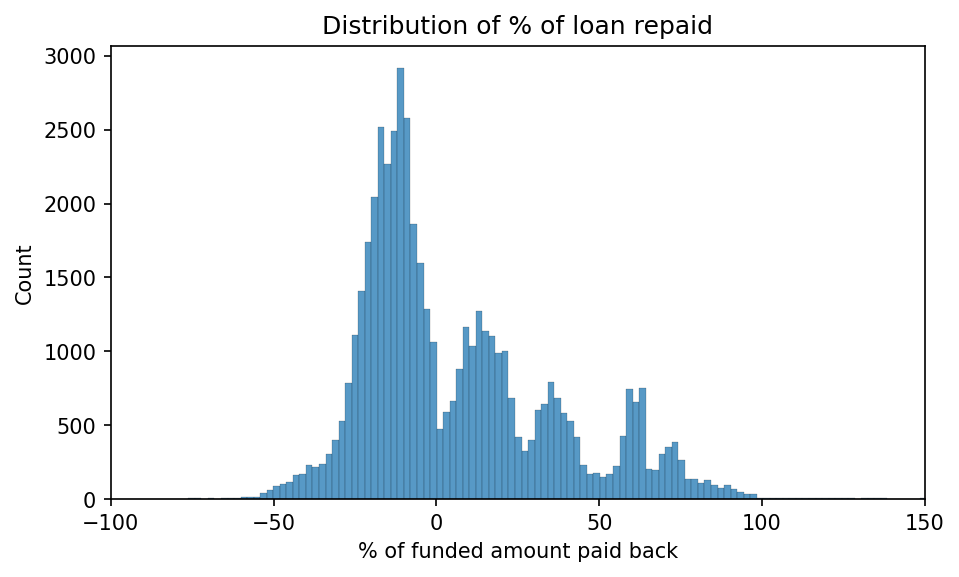

In [10]:
plt.figure(figsize=(7,4),dpi=150)
sns.histplot(percentage_paid_back)
plt.title('Distribution of % of loan repaid')
plt.xlim(-100,150)
plt.xlabel('% of funded amount paid back')

# plt.yscale('log')

In [11]:
percent_inv_recovered = (data['funded_amount_inv'].sum() - data['total_payment_inv'].sum())/data['funded_amount_inv'].sum()*100
print(f"Percentage of investor funds recovered: {round(percent_inv_recovered,2)}%")

Percentage of investor funds recovered: 7.76%


In [12]:
percent_tot_recovered = (data['funded_amount'].sum() - data['total_payment'].sum())/data['funded_amount'].sum()*100
print(f"Percentage of total funds recovered: {round(percent_inv_recovered,2)}%")

Percentage of total funds recovered: 7.76%


In [13]:
data.dtypes.value_counts()

float64           21
object            10
int64              6
datetime64[ns]     5
uint8              2
bool               1
dtype: int64

In [14]:
six_months_ahead = pd.Timestamp.today() + pd.DateOffset(months=6)
active_loans_6_months = data[(data['issue_date'] < six_months_ahead) & (data['36 months'])]


In [18]:
# Assuming '36 months' column exists as a boolean term indicator
# 'loan_start_date', 'installment', 'next_payment_date', 'amount_due'

# Filter for loans active within the next 6 months
six_months_ahead = pd.Timestamp.today() + pd.DateOffset(months=6)
active_loans_6_months = data[(data['issue_date'] < six_months_ahead) & (data['36 months'])]

# Calculate future payments for the next 6 months
active_loans_6_months['remaining_payments'] = 6 - (pd.Timestamp.today().month - active_loans_6_months['issue_date'].dt.month)
active_loans_6_months['repayment_amount_6_months'] = active_loans_6_months['installment'] * active_loans_6_months['remaining_payments']

# Summarize relevant metrics
summary_6_months = active_loans_6_months[['issue_date', 'next_payment_date', 'repayment_amount_6_months']]


/tmp/ipykernel_290289/2658672644.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_loans_6_months['remaining_payments'] = 6 - (pd.Timestamp.today().month - active_loans_6_months['issue_date'].dt.month)
/tmp/ipykernel_290289/2658672644.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_loans_6_months['repayment_amount_6_months'] = active_loans_6_months['installment'] * active_loans_6_months['remaining_payments']


In [ ]:
summary_6_months.repayment_amount_6_months.sum()

,issue_date,next_payment_date,repayment_amount_6_months
6,2021-01-01,NaT,-1019.56
13,2021-01-01,2022-02-01,-1234.92
35,2021-01-01,2022-02-01,-1246.08
114,2021-01-01,2022-02-01,-3142.44
126,2021-01-01,2022-02-01,-978.76
...,...,...,...
54093,2013-10-01,2015-10-01,1026.35
54100,2016-03-01,NaT,-81.00
54120,2013-10-01,2016-11-01,866.25
54161,2013-09-01,2016-10-01,313.68


In [ ]:
pd.Timestamp.now()

Timestamp('2023-11-23 19:27:14.577043')

In [ ]:
six_months_payments = df[df['next_payment_date'] <= pd.Timestamp.now() + pd.DateOffset(months=6)]

# Calculate the projected percentage of recovery in the next 6 months
# projected_recovery_percentage = (six_months_payments['total_payments'].sum() / df['funded_amount'].sum()) * 100


TypeError: '<=' not supported between instances of 'str' and 'Timestamp'

In [ ]:
RDS_data_clean.isnull().sum()[RDS_data.isnull().sum()>10000]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [ ]:
aksjbd = pd.read_csv('RDS_data_pre_transform.csv',index_col=0)

In [ ]:
aksjbd.dtypes.value_counts()

float64    21
object     12
int64      11
bool        1
dtype: int64

In [11]:
from preprocessing import DataPreprocessor, DataTransform
# data_transformer = DataPreprocessor(data)
data_transformer = DataTransform(pd.read_csv('RDS_data.csv',index_col=0))


In [18]:
data_transformer.data.isnull().sum()[data_transformer.data.isnull().sum()>0]

funded_amount                   3007
term                            4772
int_rate                        5169
issue_date                     54231
earliest_credit_line           54231
mths_since_last_delinq         31002
mths_since_last_record         48050
last_payment_date              54231
next_payment_date              54231
last_credit_pull_date          54231
collections_12_mths_ex_med        51
mths_since_last_major_derog    46732
dtype: int64

In [21]:
pd.read_csv('RDS_data.csv',index_col=0).transpose()

,0,1,2,3,4,5,6,7,8,9,...,54221,54222,54223,54224,54225,54226,54227,54228,54229,54230
id,38676116,38656203,38656154,38656128,38656121,38656111,38656110,38656067,38656063,38656052,...,395632,90395,88637,88046,115606,76597,142608,117045,88854,72323
member_id,41461848,41440010,41439961,41439934,41439927,41439917,41439916,41439872,41439868,41439857,...,91027,90390,88629,88023,87310,76583,74724,70978,70699,70694
loan_amount,8000,13200,16000,15000,15000,2525,6675,26500,10000,10000,...,5500,5000,6000,4400,12800,5000,5000,3500,5000,5000
funded_amount,8000.0,13200.0,16000.0,15000.0,15000.0,2525.0,6675.0,26500.0,10000.0,NaN,...,5500.0,5000.0,6000.0,4400.0,12800.0,5000.0,5000.0,3500.0,5000.0,5000.0
funded_amount_inv,8000.0,13200.0,16000.0,15000.0,15000.0,2525.0,6675.0,26200.0,10000.0,10000.0,...,5450.0,1325.0,650.0,1400.0,1000.0,1775.0,2350.0,2225.0,225.0,350.0
term,36 months,36 months,36 months,36 months,36 months,36 months,NaN,NaN,60 months,36 months,...,36 months,36 months,36 months,36 months,NaN,36 months,36 months,36 months,36 months,36 months
int_rate,7.49,6.99,7.49,14.31,6.03,11.44,21.99,19.99,12.99,8.19,...,13.16,8.07,10.59,9.64,15.01,9.01,10.59,7.43,7.43,11.54
instalment,248.82,407.52,497.63,514.93,456.54,83.2,254.89,701.95,227.48,314.25,...,185.74,156.84,195.28,141.25,443.81,159.03,162.73,108.77,155.38,164.98
grade,A,A,A,C,A,B,E,E,C,A,...,C,A,C,B,F,B,C,A,A,C
sub_grade,A4,A3,A4,C4,A1,B4,E5,E3,C2,A5,...,C3,A4,C2,B4,F1,B2,C2,A2,A2,C5


In [13]:
RDS_data_processed.data

,loan_id,member_id,loan_amount,int_rate,loan_grade,loan_sub_grade,employment_length,home_ownership,annual_inc,verification_status,...,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,term_36 months,term_60 months,36 months
0,38676116,41461848,8000,7.49,A,A4,5,MORTGAGE,46000.0,Not Verified,...,248.82,2022-02-01,2022-01-01,0.0,5.0,1,INDIVIDUAL,1,0,NaN
1,38656203,41440010,13200,6.99,A,A3,9,RENT,50000.0,Not Verified,...,407.52,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL,1,0,NaN
2,38656154,41439961,16000,7.49,A,A4,8,MORTGAGE,73913.0,Source Verified,...,12850.16,NaT,2021-10-01,0.0,NaN,1,INDIVIDUAL,1,0,NaN
3,38656128,41439934,15000,14.31,C,C4,1,RENT,42000.0,Source Verified,...,13899.67,NaT,2021-06-01,0.0,NaN,1,INDIVIDUAL,1,0,NaN
4,38656121,41439927,15000,6.03,A,A1,15,MORTGAGE,145000.0,Verified,...,456.54,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54190,123133,114358,11050,15.96,F,F4,3,RENT,27716.0,Not Verified,...,388.27,2015-01-01,2022-01-01,0.0,NaN,1,INDIVIDUAL,1,0,NaN
54199,55521,107577,1000,16.08,F,F2,1,RENT,30000.0,Not Verified,...,538.97,2016-04-01,2016-03-01,0.0,NaN,1,INDIVIDUAL,1,0,NaN
54203,185352,105254,6000,9.64,B,B4,1,RENT,18000.0,Not Verified,...,193.55,NaT,2016-12-01,0.0,NaN,1,INDIVIDUAL,1,0,NaN
54204,122637,104675,4000,7.75,A,A3,1,OWN,61800.0,Not Verified,...,126.29,NaT,2016-08-01,0.0,NaN,1,INDIVIDUAL,1,0,NaN


In [14]:
RDS_data

,loan_id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,installment,loan_grade,loan_sub_grade,...,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type
0,38676116,41461848,8000,8000.0,8000.0,36 months,7.49,248.82,A,A4,...,0.00,0.00,2022-01-01,248.82,2022-02-01,2022-01-01,0.0,5.0,1,INDIVIDUAL
1,38656203,41440010,13200,13200.0,13200.0,36 months,6.99,407.52,A,A3,...,0.00,0.00,2022-01-01,407.52,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL
2,38656154,41439961,16000,16000.0,16000.0,36 months,7.49,497.63,A,A4,...,0.00,0.00,2021-10-01,12850.16,NaT,2021-10-01,0.0,NaN,1,INDIVIDUAL
3,38656128,41439934,15000,15000.0,15000.0,36 months,14.31,514.93,C,C4,...,0.00,0.00,2021-06-01,13899.67,NaT,2021-06-01,0.0,NaN,1,INDIVIDUAL
4,38656121,41439927,15000,15000.0,15000.0,36 months,6.03,456.54,A,A1,...,0.00,0.00,2022-01-01,456.54,2022-02-01,2022-01-01,0.0,NaN,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54226,76597,76583,5000,5000.0,1775.0,36 months,9.01,159.03,B,B2,...,0.00,0.00,2016-07-01,160.61,NaT,2016-07-01,NaN,NaN,1,INDIVIDUAL
54227,142608,74724,5000,5000.0,2350.0,36 months,10.59,162.73,C,C2,...,0.00,0.00,2016-10-01,490.01,NaT,2016-09-01,0.0,NaN,1,INDIVIDUAL
54228,117045,70978,3500,3500.0,2225.0,36 months,7.43,108.77,A,A2,...,0.00,0.00,2016-09-01,110.58,2016-09-01,2013-05-01,NaN,NaN,1,INDIVIDUAL
54229,88854,70699,5000,5000.0,225.0,36 months,7.43,155.38,A,A2,...,0.00,0.00,2014-03-01,0.00,NaT,2013-05-01,NaN,NaN,1,INDIVIDUAL
